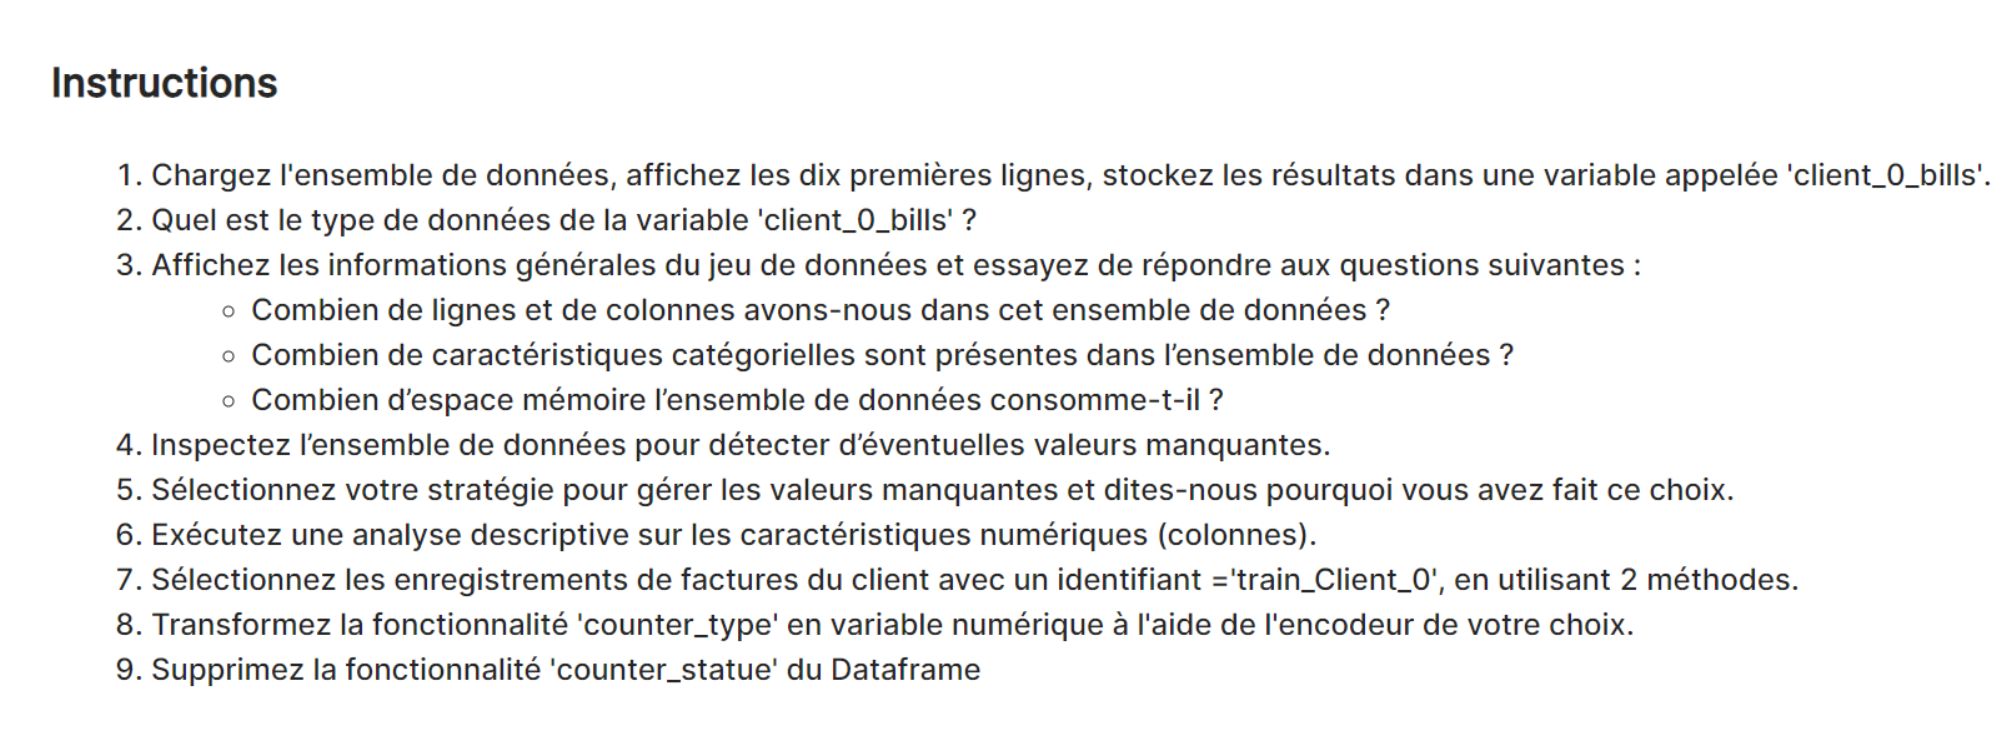

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DataTunisElec = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pandas/STEG_BILLING_HISTORY.csv',low_memory=False)

2. client_0_bills et un DataFrame. C'est le DataFrame constitue des 10 premieres ligne de DataTunisElect

In [ ]:
client_0_bills = DataTunisElec.head(10)
display(client_0_bills, type(client_0_bills))
#DataTunisElec['counter_statue'] = DataTunisElec['counter_statue'].astype(int)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667.0,0,203,8.0,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667.0,0,203,6.0,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667.0,0,203,8.0,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667.0,0,207,8.0,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667.0,0,207,9.0,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667.0,0,207,9.0,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667.0,0,207,9.0,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667.0,0,207,9.0,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667.0,0,203,9.0,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667.0,0,203,6.0,1,1082,0,0,0,9156,10238,4,ELEC


pandas.core.frame.DataFrame

3. Dans ce jeu de donnees , nous avons :
* 16 colonnes et 4476749 lignes dont
    * 2 colonnes de **float64**, 10 colonnes de **int64** et 4 colonnes de donnees **categorielles**
* ce fichier consomme : **546.5+ MB** en memoire
  

In [ ]:
DataTunisElec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   client_id             object 
 1   invoice_date          object 
 2   tarif_type            int64  
 3   counter_number        float64
 4   counter_statue        object 
 5   counter_code          int64  
 6   reading_remarque      float64
 7   counter_coefficient   int64  
 8   consommation_level_1  int64  
 9   consommation_level_2  int64  
 10  consommation_level_3  int64  
 11  consommation_level_4  int64  
 12  old_index             int64  
 13  new_index             int64  
 14  months_number         int64  
 15  counter_type          object 
dtypes: float64(2), int64(10), object(4)
memory usage: 546.5+ MB


4. Detection des donnees manquantes

* Pour une raison que j'ignore le nombre de colonne Non-Null Count ne s'affiche
pas avec la fonction **`info()`**. Pour cela on a trouve une alternative : **`display(DataTunisElec.isnull().sum())`** ce bout de code permet d'afficher le nombre totales d'elemnent  nuls sur chaque colonne. On remarque ainsi que les colonnes **counter_number** et **reading_remarque**  ont resp **48** et **4531** celulles vides.




In [ ]:
display(DataTunisElec.isnull().sum())
DataTunisElec.dropna(inplace= True)
#print('\n\n')
#display(DataTunisElec.isnull().sum(), len(DataTunisElec))

client_id                  0
invoice_date               0
tarif_type                 0
counter_number            48
counter_statue             0
counter_code               0
reading_remarque        4531
counter_coefficient        0
consommation_level_1       0
consommation_level_2       0
consommation_level_3       0
consommation_level_4       0
old_index                  0
new_index                  0
months_number              0
counter_type               0
dtype: int64



* On decide de supprimer toutes les lignes sans numero de compteur. c'est a dire les cellules ou **counter_number = 0**



In [ ]:
doublons = DataTunisElec[DataTunisElec.duplicated()]
#display(doublons)
DataTunisElec.drop_duplicates(inplace=True)
#doublons = DataTunisElec[DataTunisElec.duplicated()]
#display(doublons)

7. 2ieme Methode pour selectionner train_client_0

In [ ]:
train_client_0_2 = DataTunisElec.loc[:10]
display(train_client_0_2)

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667.0,0,203,8.0,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667.0,0,203,6.0,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667.0,0,203,8.0,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667.0,0,207,8.0,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667.0,0,207,9.0,1,572,0,0,0,15066,15638,12,ELEC
5,train_Client_0,2017-07-17,11,1335667.0,0,207,9.0,1,314,0,0,0,15638,15952,8,ELEC
6,train_Client_0,2018-12-07,11,1335667.0,0,207,9.0,1,541,0,0,0,15952,16493,12,ELEC
7,train_Client_0,2019-03-19,11,1335667.0,0,207,9.0,1,585,0,0,0,16493,17078,8,ELEC
8,train_Client_0,2011-07-22,11,1335667.0,0,203,9.0,1,1200,186,0,0,7770,9156,4,ELEC
9,train_Client_0,2011-11-22,11,1335667.0,0,203,6.0,1,1082,0,0,0,9156,10238,4,ELEC


8. Utilusation de **LabelEncoder**

In [ ]:
encoder = LabelEncoder()
DataTunisElec['counter_type'] = encoder.fit_transform(DataTunisElec['counter_type'])

9. supression de colonnes

In [ ]:
DataTunisElec.drop('counter_statue', inplace=True, axis=1)

In [ ]:
DataTunisElec.to_csv('/content/drive/MyDrive/Colab Notebooks/Pandas/FINAL_STEG_BILLING_HISTORY.csv')